### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
# tych bibliotek używamy do wizualizacji naszych danych

import cufflinks as cf
# użyjemy jej do interaktywnego podlgądu danych

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# przyda nam się do stworzenia zbioru treningowego oraz testowego oraz zaimportowania modelu regresji

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# wykorzystamy do przedstawienia informacji składających się na jakość naszego modelu

%matplotlib inline

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
# Anaconda
#os.getcwd()
#base_data = pd.read_csv("DSP_6.csv")

# Google Colab
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUM04')
base_data = pd.read_csv("DSP_6.csv")

Mounted at /content/drive


Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data Co właściwie będziemy robić? Wykorzystamy model regresji logistycznej do przewidzenia, która zmienna ma największe znaczenie w oszacowaniu czy dana osoba przeżyje katastrofę.

In [ ]:
train = pd.read_csv("DSP_6.csv")
# na tym etapie tworzymy nową zmienną, którą nazywamy train, zawierającą nasz zbiór danych
# tym razem nazywamy naszą bazę danych jako train, ale możemy równie dobrze określić je jako df

In [ ]:
train.head()
# pclass to klasa pasażerów
# sib to liczba rodzeństwa lub żona/mąż
# embarked to port zaokrętowania (C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Teraz widzimy już jak wyglądają nasze dane. Zanim przejdziemy dalej musimy zrobić jeszcze kilka istotnych rzeczy - sprawdzić czy mamy brakujące dane oraz dokonać konwersji niektórych zmiennych.

#### 2.1. Brakujące dane

In [ ]:
train.isnull().any()
# to kod z poprzednich zajęć - sprawdzamy czy mamy jakiekolwiek brakujące dane

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

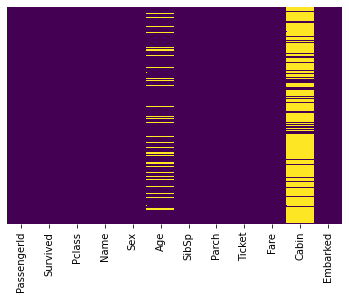

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

Już po tej prostej wizualizacji widzimy, że mamy dużo przypadków brakujących danych odnoszących się do wieku oraz kabiny. Brakujące dane odnośnie wieku możemy zastąpić średnią (jak na poprzednich zajęciach), natomiast w przypadku informacji odnoszącej się do kabiny taki zabieg nie byłby już poprawny (mamy za dużo takich przypadków). Usuniemy zatem zmienną odnoszącą się do kabiny.

In [ ]:
train = train.drop(columns=['Cabin'])
# w kroku pierwszym pozbywamy się zmiennej "cabin"

Widzimy, że już jest lepiej, ale dalej mamy brakujące dane w przypadku dwóch zmiennych.

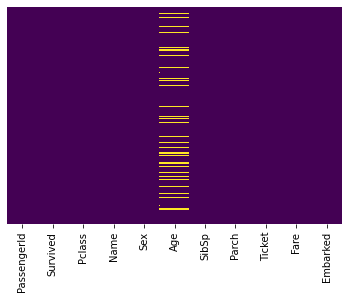

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [ ]:
train = train.fillna(train.mean())
# w kroku drugim wypełniamy brakujące wartości średnią

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Możemy sobie pozwolić na wypełnienie brakujących wartości średnią.

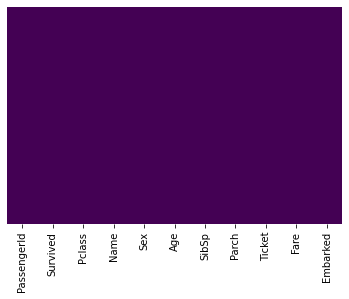

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [ ]:
train = train.dropna()
# w kroku trzecim usuwamy informacje dotyczące braków danych, w miejscach, które nie zostały zastąpione średnią

Usunęliśmy wszystkie inne przypadki gdzie nie mogliśmy zastosować automatycznego wypełnienia średnią.

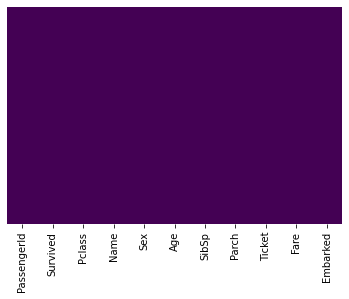

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Mamy potwierdzenie, że nasz zbiór danych nie zawiera już brakujących wartości.

#### 2.2. Eksploracja danych

Poniżej znajduje się kilka sposobów na przedstawienie wykresów do naszych danych.

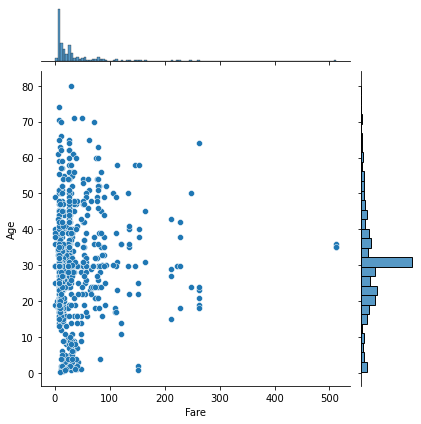

In [ ]:
sns.jointplot(x='Fare',y='Age',data=train)

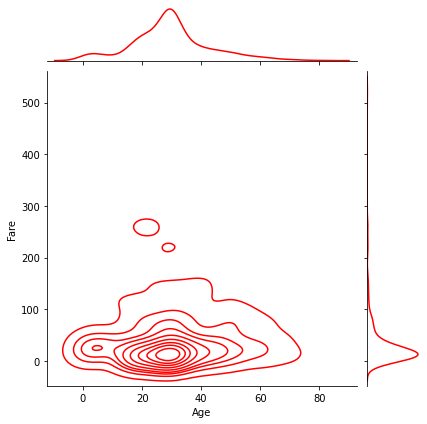

In [ ]:
sns.jointplot(x='Age',y='Fare',data=train,color='red',kind='kde');

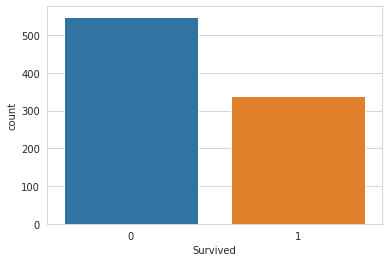

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

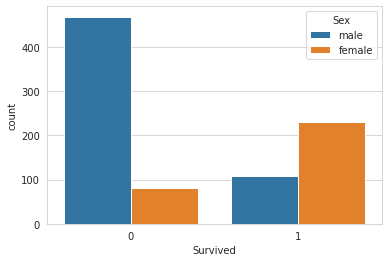

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

Bez specjalnych obliczeń już widzimy, że przeżyło więcej kobiet w porównaniu do mężczyzn.

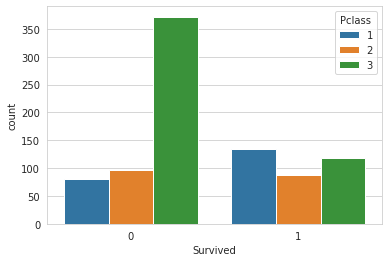

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)
# już na oko widzimy, że osoby, które nie przeżyły były raczej z klasy trzeciej

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



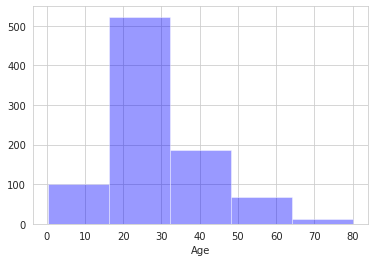

In [ ]:
sns.distplot(train['Age'],kde=False,color='blue',bins=5)

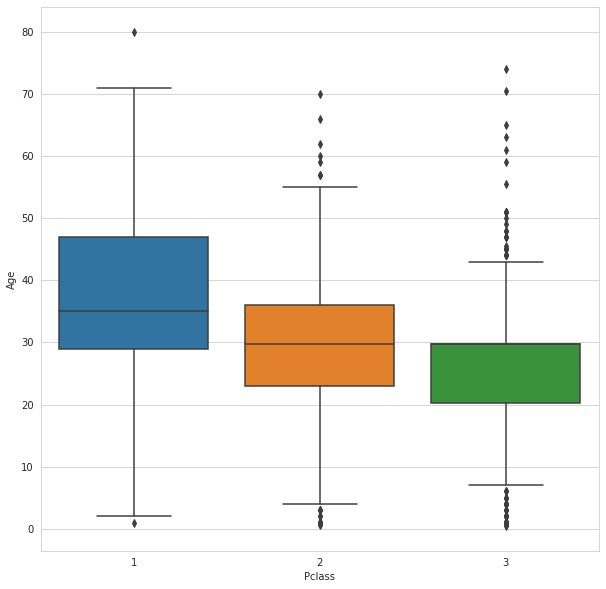

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=train)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz klasy pasażerów

In [ ]:
cf.go_offline()

In [ ]:
train['Age'].iplot(kind='hist',bins=20,color='green')

#### 2.3. Konwersja zmiennych do modelu regresji

Zanim przejdziemy dalej musimy jeszcze zadbać o właściwe nazewnictwo zmiennych. W naszej bazie danych mamy na razie informację w postaci Stringów - np. płeć jest oznaczona jako male lub female. Musimy to naprawić za pomocą "dumy variable". Zamienimy je sobie na wartości np. 0 będzie dla mężczyzn i 1 dla kobiet. Przczytaj o tym więcej w tym miejscu - https://pl.wikipedia.org/wiki/Dummy_coding

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

W tym kroku tworzymy dwie nowe zmienne, dla których będziemy chcieli dokonać konwersji. Zanim przejdziemy dalej możemy zobaczyć jak wyglądają.

In [ ]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
train = pd.concat([train,sex,embark],axis=1)
# dodajemy teraz te kolumny do naszego zbioru danych train

In [ ]:
train.head()
# możemy podejrzeć jak to wygląda po dodaniu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
# te kolumny już nam nie są dłużej potrzebne - przerobiliśmy je na 'dummy variables' a niektóre nie dodają nowych informacji

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### 3. Regresja logistyczna
#### 🇬🇧 Logistic Regression

In [ ]:
X = train.drop('Survived', axis=1)
y = train['Survived']
# najpierw określamy zmienną, którą będziemy chcieli przewidzieć

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [ ]:
logmodel = LogisticRegression(max_iter = 500)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
# na tym etapie mamy już wytrenowany model

In [ ]:
print(classification_report(y_test,predictions))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [ ]:
confusion_matrix(y_test, predictions)
# tworzymy w tym momencie confusion matrix, co pozwala nam na uzyskanie informacji dotyczących błędów popełnianych przez model

array([[52,  5],
       [ 8, 24]])

# Zadania

### Zadanie 1

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

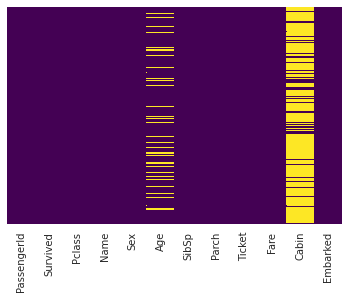

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train = train.drop(columns=['Cabin'])
train = train.fillna(train.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



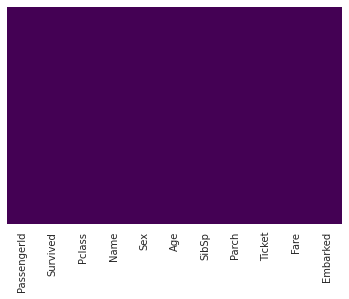

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [ ]:
train = train.dropna()
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### Zadanie 2

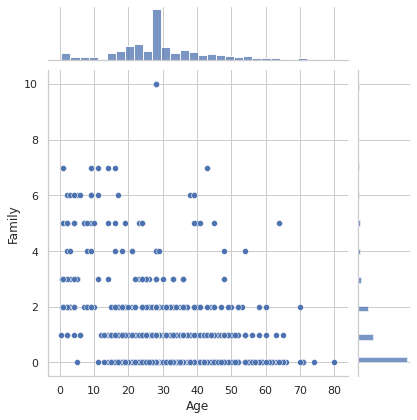

In [ ]:
family = train[['Age', 'SibSp', 'Parch']]
family['Family'] = family['SibSp'] + family['Parch']
sns.jointplot(x='Age',y='Family',data=family)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



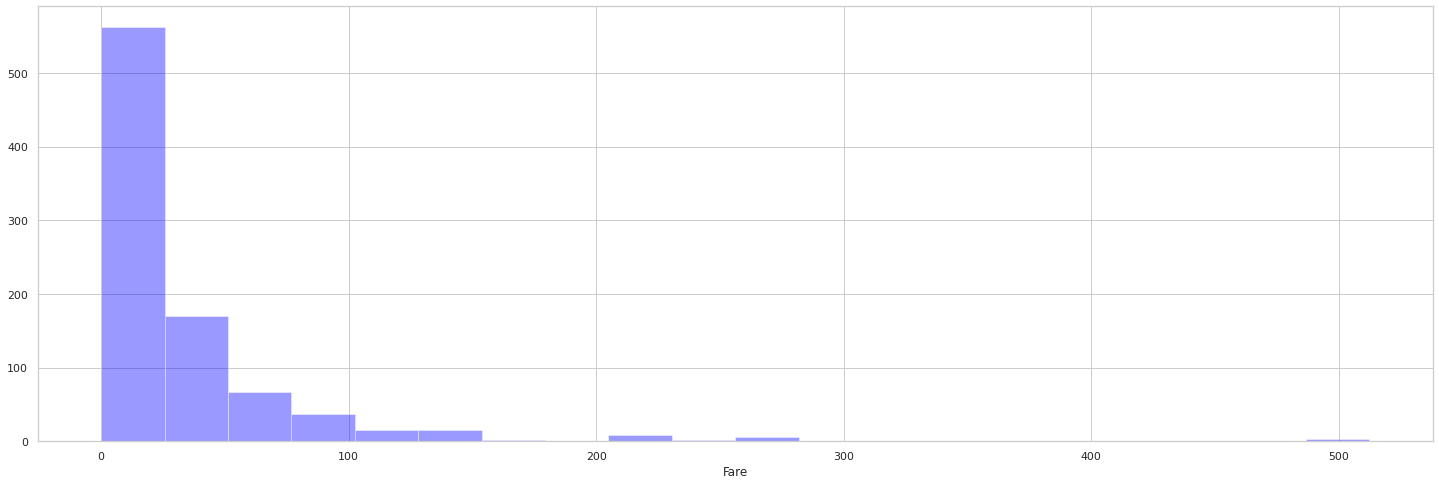

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize =(25, 8))
sns.distplot(train['Fare'], kde = False, color = 'blue', bins = 20);

### Zadanie 3

Pojawia się błąd

```
# ValueError: could not convert string to float: 'Flynn, Mr. John'
```

Co wynika ze złego formatu danych w modelu, który nie był wcześniej przystosowany. Do regresji logicznej potrzebujemy danych numerycznych.



In [ ]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=13)
logmodel = LogisticRegression(max_iter = 600)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       105
           1       0.85      0.64      0.73        73

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.82      0.81      0.80       178



array([[97,  8],
       [26, 47]])

In [ ]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=101)
logmodel = LogisticRegression(max_iter = 400)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



array([[98,  9],
       [24, 47]])

### Zadanie 4


In [ ]:
base_data = pd.read_csv("DSP_2.csv")
train = pd.read_csv("DSP_2.csv")

In [ ]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
train.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
chest_pain = pd.get_dummies(train['ChestPainType'],drop_first=True)
resting_ecg = pd.get_dummies(train['RestingECG'],drop_first=True)
exercise_angina = pd.get_dummies(train['ExerciseAngina'],drop_first=True)
slope = pd.get_dummies(train['ST_Slope'],drop_first=True)

In [ ]:
sex

,M
0,1
1,0
2,1
3,0
4,1
...,...
913,1
914,1
915,1
916,0


In [ ]:
chest_pain

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0
...,...,...,...
913,0,0,1
914,0,0,0
915,0,0,0
916,1,0,0


In [ ]:
resting_ecg

,Normal,ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
913,1,0
914,1,0
915,1,0
916,0,0


In [ ]:
exercise_angina

,Y
0,0
1,0
2,0
3,1
4,0
...,...
913,0
914,0
915,1
916,0


In [ ]:
slope

,Flat,Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
913,1,0
914,1,0
915,1,0
916,1,0


In [ ]:
train = pd.concat([train,sex,chest_pain, resting_ecg, exercise_angina, slope],axis=1)
train.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina', 'ST_Slope'],axis=1,inplace=True)

In [ ]:
train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [ ]:
X = train.drop('HeartDisease', axis=1)
y = train['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(train.drop('HeartDisease',axis=1),
                                                    train['HeartDisease'], test_size=0.10,
                                                    random_state=101)
logmodel = LogisticRegression(max_iter = 500)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        51

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



array([[35,  6],
       [ 7, 44]])

Patrząc na uzyskane podsumowanie widzimy dobry wynik nie tylko precyzji, ale też inne parametry modelu, także wydaje się on być dobrze wytrenowany.